<a href="https://colab.research.google.com/github/LeoDinga/DL_Project/blob/main/DL_project_Leo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Num frames needs to be the same and the number of epochs. Study better this


In [1]:
!git clone https://github.com/THETIS-dataset/dataset.git
!mv dataset data

Cloning into 'dataset'...
remote: Enumerating objects: 8471, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8471 (delta 0), reused 5 (delta 0), pack-reused 8465 (from 1)
Receiving objects: 100% (8471/8471), 12.70 GiB | 18.65 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Updating files: 100% (8379/8379), done.


In [7]:
import os
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as T
import torchvision.models as models
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score
import shutil
import random

In [8]:
# See if it can find the videos
for root, dirs, files in os.walk("data"):
    if any(f.endswith(('.mp4', '.avi')) for f in files):
        print(f"Found videos in: {root}")

Found videos in: data/VIDEO_Skelet3D/backhand2hands
Found videos in: data/VIDEO_Skelet3D/forehand_slice
Found videos in: data/VIDEO_Skelet3D/backhand
Found videos in: data/VIDEO_Skelet3D/smash
Found videos in: data/VIDEO_Skelet3D/slice_service
Found videos in: data/VIDEO_Skelet3D/kick_service
Found videos in: data/VIDEO_Skelet3D/flat_service
Found videos in: data/VIDEO_Skelet3D/backhand_volley
Found videos in: data/VIDEO_Skelet3D/backhand_slice
Found videos in: data/VIDEO_Skelet3D/forehand_volley
Found videos in: data/VIDEO_Skelet3D/forehand_openstands
Found videos in: data/VIDEO_Skelet3D/forehand_flat
Found videos in: data/VIDEO_Depth/backhand2hands
Found videos in: data/VIDEO_Depth/forehand_slice
Found videos in: data/VIDEO_Depth/backhand
Found videos in: data/VIDEO_Depth/smash
Found videos in: data/VIDEO_Depth/slice_service
Found videos in: data/VIDEO_Depth/kick_service
Found videos in: data/VIDEO_Depth/flat_service
Found videos in: data/VIDEO_Depth/backhand_volley
Found videos in: 

In [9]:
# Similar to the previous one but it also shows the videos in each folder
data_path = 'data'

# Print out the directory structure
for root, dirs, files in os.walk(data_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Root: data
Dirs: ['VIDEO_Skelet3D', 'papers', '.git', 'VIDEO_Depth', 'VIDEO_Mask', 'VIDEO_Skelet2D', 'VIDEO_RGB']
Files: ['README.md']
----------------------------------------
Root: data/VIDEO_Skelet3D
Dirs: ['backhand2hands', 'forehand_slice', 'backhand', 'smash', 'slice_service', 'kick_service', 'flat_service', 'backhand_volley', 'backhand_slice', 'forehand_volley', 'forehand_openstands', 'forehand_flat']
Files: []
----------------------------------------
Root: data/VIDEO_Skelet3D/backhand2hands
Dirs: []
Files: ['p3_backhand2h_skelet3D_s3.avi', 'p55_backhand2h_skelet3D_s2.avi', 'p15_backhand2h_skelet3D_s3.avi', 'p38_backhand2h_skelet3D_s3.avi', 'p30_backhand2h_skelet3D_s3.avi', 'p31_backhand2h_skelet3D_s3.avi', 'p37_backhand2h_skelet3D_s3.avi', 'p41_backhand2h_skelet3D_s3.avi', 'p53_backhand2h_skelet3D_s3.avi', 'p52_backhand2h_skelet3D_s1.avi', 'p18_backhand2h_skelet3D_s3.avi', 'p51_backhand2h_skelet3D_s2.avi', 'p39_backhand2h_skelet3D_s2.avi', 'p14_backhand2h_skelet3D_s3.avi', 'p9_b

In [10]:
source = 'data'
output = 'split_data'
folders = ["VIDEO_Depth", "VIDEO_Mask", "VIDEO_RGB", "VIDEO_Skelet2D", "VIDEO_Skelet3D"]

train_ratio = 0.8

for folder in folders:
  folder_path = os.path.join(source, folder)

  for class_name in os.listdir(folder_path): #this will go trough each class folder (e.g backhand) in the main folder (e.g VIDEO_RGB)
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue

        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random.shuffle(files)  # this will shuffle the files

        split_idx = int(len(files) * train_ratio) #split data
        train_files = files[:split_idx]
        test_files = files[split_idx:]

        train_class_dir = os.path.join(output, "train", folder, class_name) # make directory for train data
        test_class_dir = os.path.join(output, "test", folder, class_name) # make directory for test data
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)


        for file in train_files:
            shutil.copy2(os.path.join(class_path, file), os.path.join(train_class_dir, file))
        for file in test_files:
            shutil.copy2(os.path.join(class_path, file), os.path.join(test_class_dir, file))

print("All data split into training and test sets.")


All data split into training and test sets.


In [16]:
# seeing if its making the split

def count_files(root):
    total = 0
    for subdir, _, files in os.walk(root):
        total += len(files)
    return total


original_total= count_files("data/VIDEO_Mask")  # or VIDEO_Depth, etc.

train_total = count_files("split_data/train/VIDEO_Mask")
test_total = count_files("split_data/test/VIDEO_Mask")

print(f"Original: {original_total}, Train: {train_total}, Test: {test_total}")
print("Total after split:", train_total + test_total)

Original: 1980, Train: 1584, Test: 396
Total after split: 1980


In [18]:
# Seeing what files are in train

train_path = 'split_data/train'

# Print out the directory structure
for root, dirs, files in os.walk(train_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)



Root: split_data/train
Dirs: ['VIDEO_Skelet3D', 'VIDEO_Depth', 'VIDEO_Mask', 'VIDEO_Skelet2D', 'VIDEO_RGB']
Files: []
----------------------------------------
Root: split_data/train/VIDEO_Skelet3D
Dirs: ['backhand2hands', 'forehand_slice', 'backhand', 'smash', 'slice_service', 'kick_service', 'flat_service', 'backhand_volley', 'backhand_slice', 'forehand_volley', 'forehand_openstands', 'forehand_flat']
Files: []
----------------------------------------
Root: split_data/train/VIDEO_Skelet3D/backhand2hands
Dirs: []
Files: ['p3_backhand2h_skelet3D_s3.avi', 'p15_backhand2h_skelet3D_s3.avi', 'p38_backhand2h_skelet3D_s3.avi', 'p30_backhand2h_skelet3D_s3.avi', 'p31_backhand2h_skelet3D_s3.avi', 'p37_backhand2h_skelet3D_s3.avi', 'p53_backhand2h_skelet3D_s3.avi', 'p18_backhand2h_skelet3D_s3.avi', 'p51_backhand2h_skelet3D_s2.avi', 'p14_backhand2h_skelet3D_s3.avi', 'p9_backhand2h_skelet3D_s2.avi', 'p40_backhand2h_skelet3D_s3.avi', 'p33_backhand2h_skelet3D_s3.avi', 'p51_backhand2h_skelet3D_s3.avi',

In [19]:
test_path = 'split_data/test'

# Print out the directory structure
for root, dirs, files in os.walk(test_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Root: split_data/test
Dirs: ['VIDEO_Skelet3D', 'VIDEO_Depth', 'VIDEO_Mask', 'VIDEO_Skelet2D', 'VIDEO_RGB']
Files: []
----------------------------------------
Root: split_data/test/VIDEO_Skelet3D
Dirs: ['backhand2hands', 'forehand_slice', 'backhand', 'smash', 'slice_service', 'kick_service', 'flat_service', 'backhand_volley', 'backhand_slice', 'forehand_volley', 'forehand_openstands', 'forehand_flat']
Files: []
----------------------------------------
Root: split_data/test/VIDEO_Skelet3D/backhand2hands
Dirs: []
Files: ['p55_backhand2h_skelet3D_s2.avi', 'p41_backhand2h_skelet3D_s3.avi', 'p52_backhand2h_skelet3D_s1.avi', 'p39_backhand2h_skelet3D_s2.avi', 'p28_backhand2h_skelet3D_s2.avi', 'p3_backhand2h_skelet3D_s2.avi', 'p4_backhand2h_skelet3D_s3.avi', 'p47_backhand2h_skelet3D_s2.avi', 'p12_backhand2h_skelet3D_s3.avi', 'p50_backhand2h_skelet3D_s3.avi', 'p26_backhand2h_skelet3D_s2.avi', 'p54_backhand2h_skelet3D_s3.avi', 'p20_backhand2h_skelet3D_s3.avi', 'p43_backhand2h_skelet3D_s2.avi', 'p

In [20]:
# See if there is duplicates
duplicates = {}

for subdir, dirs, files in os.walk(train_path):
    for file in files:

        rel_path = os.path.relpath(os.path.join(subdir, file), train_path)
        test_file_path = os.path.join(test_path, rel_path)

        if os.path.exists(test_file_path):
            if rel_path not in duplicates:
                duplicates[rel_path] = (os.path.join(subdir, file), test_file_path)

if duplicates:
    print("Duplicate files found in both train and test:")
    for rel_path, paths in duplicates.items():
        print(f"- {rel_path}")
else:
    print("No duplicate files found between train and test sets.")

✅ No duplicate files found between train and test sets.


In [21]:

def extract_frames(video_path, num_frames=20):
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # If the video is too short, return an empty list
    if total < num_frames or total == 0:
        cap.release()
        return []

    step = max(total // num_frames, 1)
    frames = []

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))  # Resize to match ResNet input size
        frames.append(frame)

    cap.release()
    return frames

In [22]:
# Seeing if the path exists
## Atention this is just to see if the function is working. The path may be always different.
video_path = 'split_data/train/VIDEO_Mask/slice_service/p11_serslice_mask_s1.avi'
print("Exists:", os.path.exists(video_path))

# seeing if the function is extracting the frames
frames = extract_frames("split_data/train/VIDEO_Mask/slice_service/p11_serslice_mask_s1.avi", num_frames=20)
print(frames)

Exists: True
[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],

In [23]:
class TennisDataset(Dataset):
    def __init__(self, root_dir, transform=None, num_frames=20):
        self.samples = []
        self.transform = transform
        self.num_frames = num_frames
        self.label_map = {}  # This will map class names to indices (0-11)

        # Step 1: Find all 12 class folders
        class_folders = set()
        for root, dirs, files in os.walk(root_dir):
            # Look for folders containing videos, but skip intermediate dirs e.g VIDEO_Mask
            if any(f.endswith(('.mp4', '.avi')) for f in files):
                class_name = os.path.basename(root)
                class_folders.add(class_name)

        # Assign labels 0-11 to classes
        self.label_map = {cls: idx for idx, cls in enumerate(sorted(class_folders))}
        self.idx_to_class = {idx: cls for cls, idx in self.label_map.items()}

        # Step 2: Load samples
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith(('.mp4', '.avi')):
                    class_name = os.path.basename(root)
                    self.samples.append((
                        os.path.join(root, file),
                        self.label_map[class_name]
                    ))

        print(f"Loaded {len(self.samples)} videos. Classes: {self.label_map}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        frames = extract_frames(path, self.num_frames)
        if not frames:
            return self.__getitem__((idx + 1) % len(self))  # this will skip corrupted videos
        frames = torch.stack([self.transform(Image.fromarray(f)) for f in frames])
        return frames.float(), label  # Ensure float32

In [24]:
class CNN_LSTM(nn.Module):
    def __init__(self, num_classes=12, hidden_size=256):
        super(CNN_LSTM, self).__init__()
        base = models.resnet18(pretrained=True)
        self.cnn = nn.Sequential(*list(base.children())[:-1])
        self.lstm = nn.LSTM(input_size=512, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        B, T, C, H, W = x.size()
        x = x.view(B*T, C, H, W)
        with torch.no_grad():
            feats = self.cnn(x).view(B, T, -1)
        out, _ = self.lstm(feats)
        return self.fc(out[:, -1, :])


In [25]:
def train(model, train_loader, val_loader, device, num_epochs=1):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  ## see thiss maybe adam is not the best

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        all_preds, all_labels = [], []
        for clips, labels in train_loader:
            clips, labels = clips.to(device), labels.to(device)
            outputs = model(clips)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        train_acc = accuracy_score(all_labels, all_preds)

        # Validation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for clips, labels in val_loader:
                clips, labels = clips.to(device), labels.to(device)
                outputs = model(clips)
                val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_acc = accuracy_score(val_labels, val_preds)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = TennisDataset(root_dir="split_data/train/VIDEO_Mask", transform=transform) # This will use only the videos from dir train and VIDEO_Mask
print(f"Number of classes: {len(train_dataset.label_map)}")

# we can now split the training dataset into subsets (training and validation)
# validatiion helps with tuning the hyperparameters.

train_subset = int(0.8 * len(train_dataset))
val_subset = len(train_dataset) - train_subset
train_ds, val_ds = random_split(train_dataset, [train_subset, val_subset])
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=4, shuffle=False, num_workers=2)

model = CNN_LSTM(num_classes=12)
train(model, train_loader, val_loader, device, num_epochs=1)

Loaded 1584 videos. Classes: {'backhand': 0, 'backhand2hands': 1, 'backhand_slice': 2, 'backhand_volley': 3, 'flat_service': 4, 'forehand_flat': 5, 'forehand_openstands': 6, 'forehand_slice': 7, 'forehand_volley': 8, 'kick_service': 9, 'slice_service': 10, 'smash': 11}
Number of classes: 12


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


Epoch 1/1, Loss: 2.4667, Train Acc: 0.1176, Val Acc: 0.1830


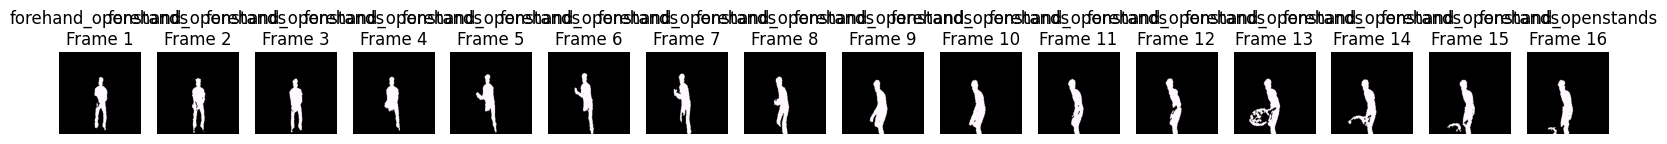

In [27]:
import matplotlib.pyplot as plt

def show_batch_multiframe(dataloader, num_frames=20):
    batch, _ = next(iter(dataloader))
    batch = batch[0]  # Take first sample
    video_path = "split_data/train/VIDEO_Mask/forehand_openstands" # First sample's path
    video_name = os.path.basename(video_path)

    fig, axes = plt.subplots(1, num_frames, figsize=(20, 3))
    for i in range(num_frames):
        frame = batch[i].permute(1, 2, 0).cpu().numpy()
        axes[i].imshow(np.clip(frame, 0, 1))
        axes[i].set_title(f"{video_name}\nFrame {i+1}")
        axes[i].axis('off')


    plt.show()

show_batch_multiframe(train_loader, num_frames=16)

In [29]:
#verify if classes are okay
print("Label range:", min(train_dataset.label_map.values()), "-", max(train_dataset.label_map.values()))
print("Model expects:", model.fc.out_features, "classes")

Label range: 0 - 11
Model expects: 12 classes


In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.save(model.state_dict(), "cnn_lstm_tennis.pth")
print("Model saved to cnn_lstm_tennis.pth")

Model saved to cnn_lstm_tennis.pth


In [32]:
def predict_video(model, video_path, device, transform, label_map):
    model.eval()
    frames = extract_frames(video_path, num_frames=20)
    if not frames:
        raise ValueError(f"No frames extracted from video: {video_path}")
    frames = [transform(Image.fromarray(f)) for f in frames]
    clip = torch.stack(frames).unsqueeze(0).to(device)  # (1, T, C, H, W)
    with torch.no_grad():
        output = model(clip)
        pred_idx = output.argmax(dim=1).item()
    return label_map[pred_idx]

In [41]:
#full_dataset = TennisDataset("data", transform=transform, num_frames=16)
dataset = TennisDataset(root_dir="split_data/test/VIDEO_Mask", transform=transform)
pred = predict_video(model, "split_data/test/VIDEO_Mask/kick_service/p11_serkick_mask_s1.avi", device, transform, dataset.idx_to_class)
print("Predicted:", pred)

Loaded 396 videos. Classes: {'backhand': 0, 'backhand2hands': 1, 'backhand_slice': 2, 'backhand_volley': 3, 'flat_service': 4, 'forehand_flat': 5, 'forehand_openstands': 6, 'forehand_slice': 7, 'forehand_volley': 8, 'kick_service': 9, 'slice_service': 10, 'smash': 11}
Predicted: smash
